In [1]:
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv('~/python-analysis/repositories3.csv', names=['author', 'file', 'lineNum', 'method', 'idiom', 'repository'])

In [3]:
# get a colum and calculate the number of each
authorRanking = df['author'].value_counts()

# get the more used idiom
idiomRanking = df['idiom'].value_counts()

# the repositories ranking
repoRanking = df['repository'].value_counts()

# line number
lineRanking = df['lineNum'].value_counts()

# file ranking
fileRanking = df['file'].value_counts()

# method ranking
methodRanking = df['method'].value_counts()

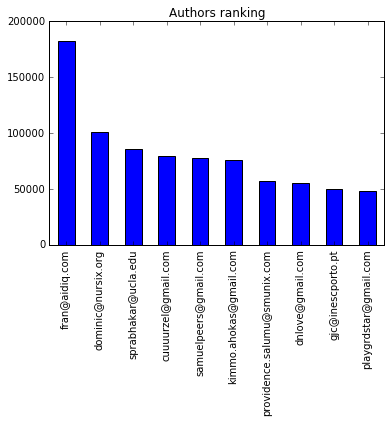

In [4]:
# best 10 authors
authorHist = authorRanking[:10].plot(kind='bar', title='Authors ranking')

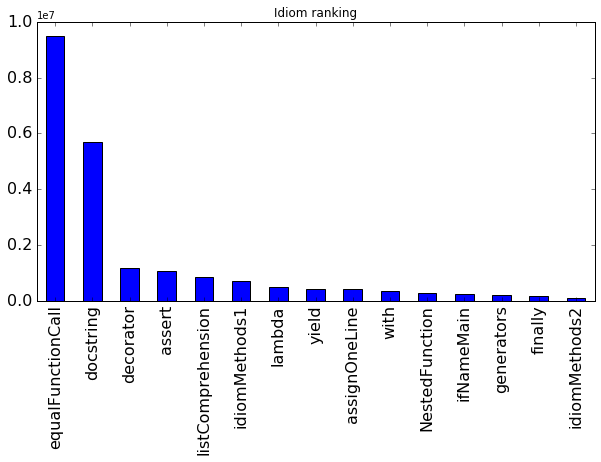

In [37]:
# idiom ranking
idiomRanking[:15].plot(kind='bar', figsize=(10, 5), title='Idiom ranking', fontsize=16)

In [11]:
# Filter equalFunctionCall to one per line found
eqFuncCallRows = df.loc[lambda df1: df1.idiom == 'equalFunctionCall', :]
print "Duplicated:", len(eqFuncCallRows)
eqFuncCallRows2 = eqFuncCallRows.drop_duplicates()
print "One / line:", len(eqFuncCallRows2)

Duplicated: 9494833
One / line: 7082581


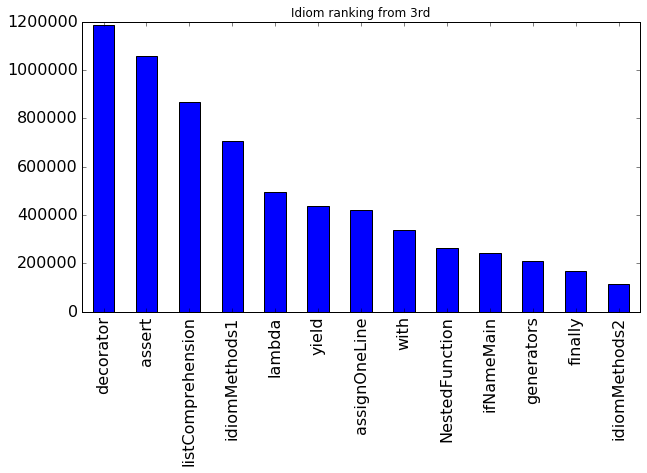

In [40]:
# Idiom ranking from third
idiomRanking[2:15].plot(kind='bar', figsize=(10, 5.2), title='Idiom ranking from 3rd', fontsize=16)

In [24]:
# How many repositories are documentated at least one time?
totalRepos = len(df['repository'].unique())
docstringIdioms = df.loc[lambda df1: df1.idiom == 'docstring', :]
docReposNum = len(docstringIdioms['repository'].unique())
print float(docReposNum)/float(totalRepos) *100, '%'

75.4423232803 %


In [25]:
# How many files are documentated at least one time?
totalFiles = len(df['file'].unique())
#docstringIdioms = df.loc[lambda df1: df1.idiom == 'docstring', :]
docFilesNum = len(docstringIdioms['file'].unique())
print float(docReposNum)/float(totalFiles) *100, '%'

4.45324390878 %


In [47]:
# How many repositories have function equal call?
totalRepos = len(df['repository'].unique())
fqcIdioms = df.loc[lambda df1: df1.idiom == 'equalFunctionCall', :]
fqcReposNum = len(fqcIdioms['repository'].unique())
print float(fqcReposNum)/float(totalRepos) *100, '%'

85.3914526092 %


In [43]:
# How many repositories have decorators?
totalRepos = len(df['repository'].unique())
decoratorIdioms = df.loc[lambda df1: df1.idiom == 'decorator', :]
decoratorReposNum = len(decoratorIdioms['repository'].unique())
print float(decoratorReposNum)/float(totalRepos) *100, '%'

40.8991810381 %


In [44]:
# How many repositories have assert?
totalRepos = len(df['repository'].unique())
assertIdioms = df.loc[lambda df1: df1.idiom == 'assert', :]
assertReposNum = len(assertIdioms['repository'].unique())
print float(assertReposNum)/float(totalRepos) *100, '%'

25.0817564357 %


In [46]:
# How many repositories have list comprehensions?
totalRepos = len(df['repository'].unique())
comprehIdioms = df.loc[lambda df1: df1.idiom == 'listComprehension', :]
comprehReposNum = len(comprehIdioms['repository'].unique())
print float(comprehReposNum)/float(totalRepos) *100, '%'

52.6078206669 %


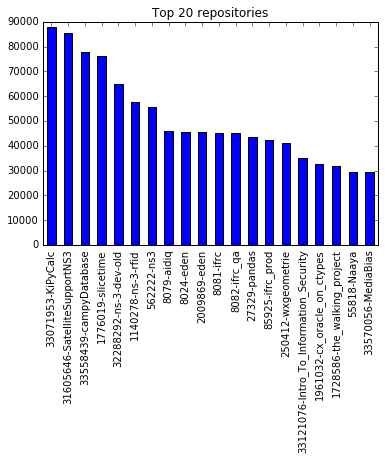

In [7]:
# Top 10 repositories
repoHist = repoRanking[:20].plot(kind='bar', title='Top 20 repositories')

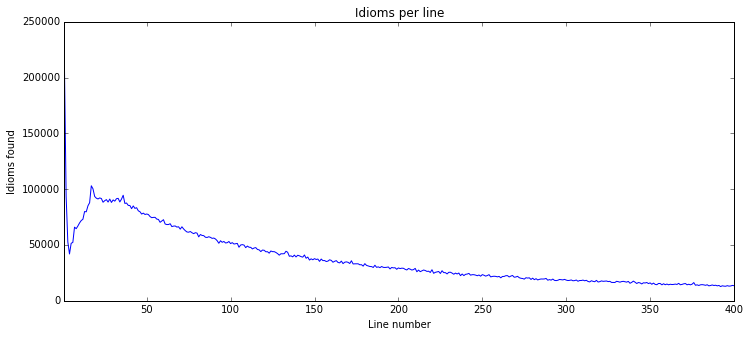

In [8]:
lineFig = lineRanking.sort_index()[:400].plot(figsize=(12, 5), title='Idioms per line')
lineFig.set_xlabel('Line number')
lineFig.set_ylabel('Idioms found')

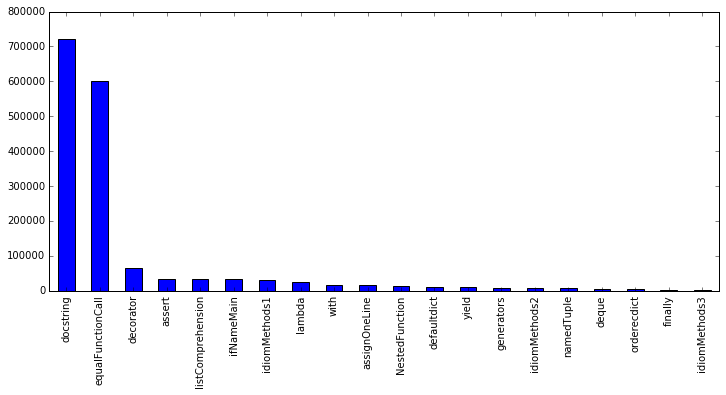

In [9]:
# Idioms in 25 first lines

df2 = df[df['lineNum'] <= 20]
df2['idiom'].value_counts().plot(figsize=(12, 5), kind='bar')
# This show that the files are documented and that's the reason that between lines 1-20 there aren't enough idioms

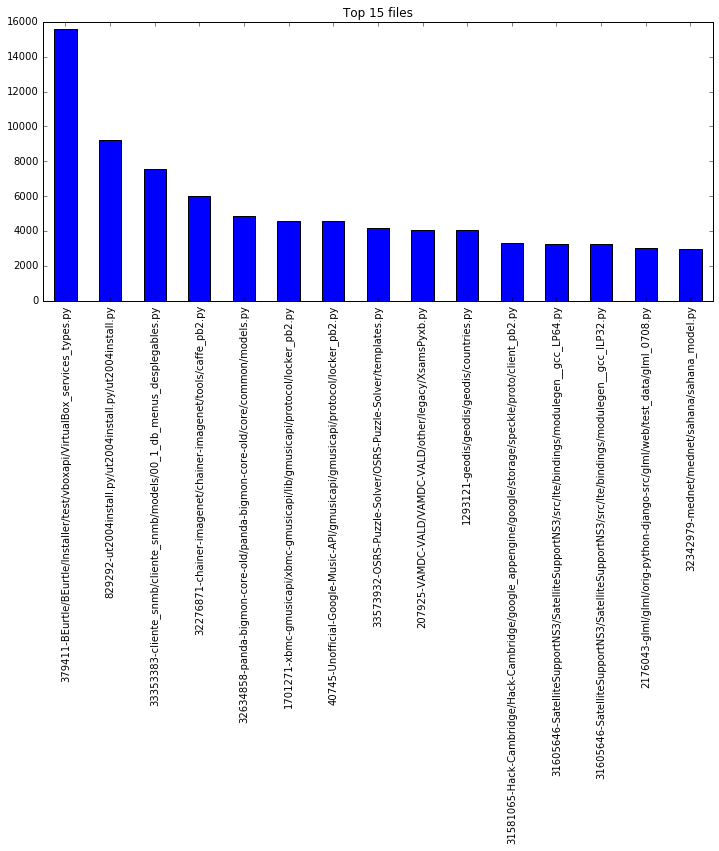

In [10]:
# top 10 files
fileHist = fileRanking[:15].plot(kind='bar', figsize=(12, 5), title='Top 15 files')

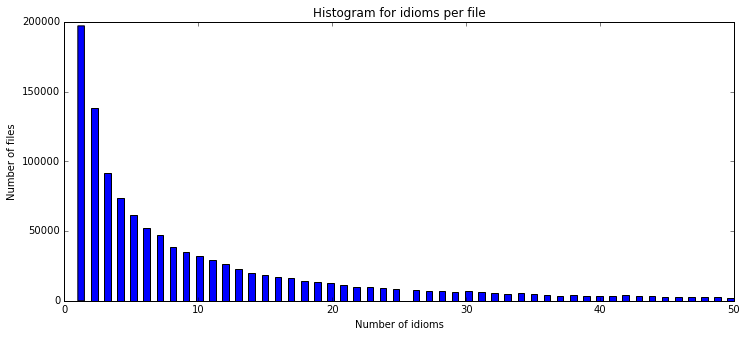

In [11]:
# Frecuencia de idioms por fichero
filesHist = fileRanking.plot(kind='hist', bins=100, range=(1,50), figsize=(12, 5), title='Histogram for idioms per file')
filesHist.set_xlabel('Number of idioms')
filesHist.set_ylabel('Number of files')

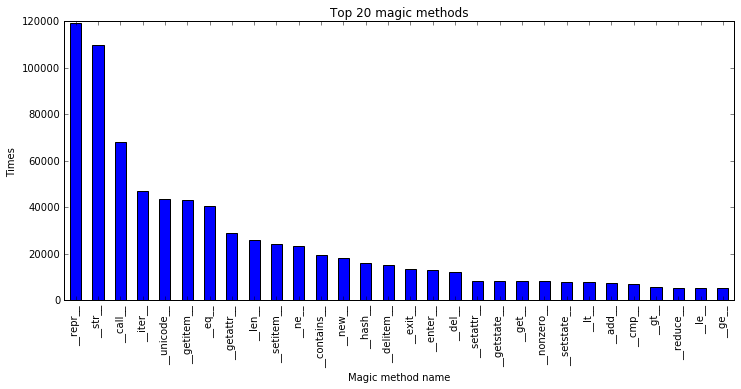

In [12]:
methodPlot = methodRanking[:30].plot(kind='bar', figsize=(12, 5), title='Top 20 magic methods')
methodPlot.set_xlabel('Magic method name')
methodPlot.set_ylabel('Times')